
  PASO 1: CARGA Y PREPROCESAMIENTO DE DATOS

────────────────────────────────────────────────────────────────────────────────
  1.1 Carga del Dataset
────────────────────────────────────────────────────────────────────────────────
  ✓ Entorno Google Colab detectado
  📂 Por favor, seleccione el archivo CSV desde su computadora



Saving Mall_Customers.csv to Mall_Customers (6).csv

  ✓ Archivo 'Mall_Customers (6).csv' cargado exitosamente

────────────────────────────────────────────────────────────────────────────────
  1.2 Exploración Inicial de Datos
────────────────────────────────────────────────────────────────────────────────
  • Dimensiones....................................... 200 filas × 5 columnas 
  • Tamaño en memoria................................. 16.95 KB 
  • Valores nulos totales............................. 0 

  Estructura del Dataset:
  ────────────────────────────────────────────────────────────────────────────
 CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
            1   Male   19                  15                      39
            2   Male   21                  15                      81
            3 Female   20                  16                       6
            4 Female   23                  16                      77
            5 Female   31          

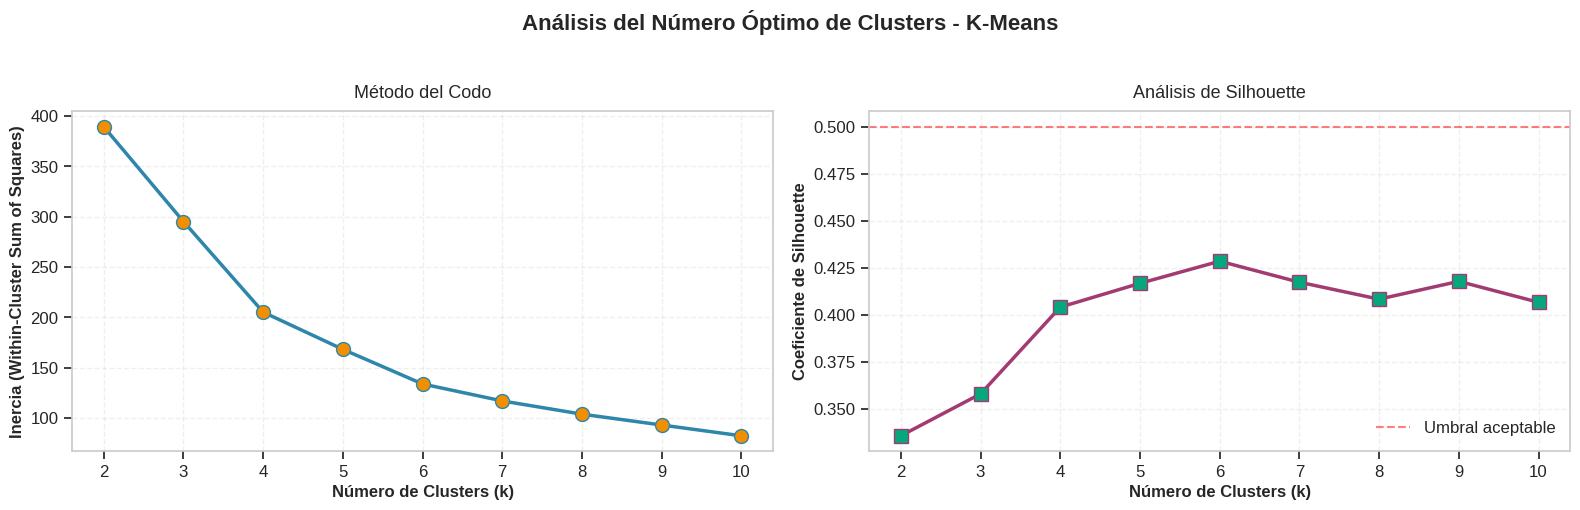


  Análisis de Resultados:
  • K con mejor Silhouette Score...................... k = 6 
  • K seleccionado para análisis...................... k = 5 

  Resultados K-Means:
  • Clusters identificados............................ 5 
  • Inercia final..................................... 168.25 
  • Iteraciones....................................... 9 

  Distribución de observaciones por cluster:
    Cluster 0:   20 observaciones ( 10.0%)
    Cluster 1:   54 observaciones ( 27.0%)
    Cluster 2:   40 observaciones ( 20.0%)
    Cluster 3:   39 observaciones ( 19.5%)
    Cluster 4:   47 observaciones ( 23.5%)

────────────────────────────────────────────────────────────────────────────────
  2.2 Clustering Jerárquico (Agglomerative)
────────────────────────────────────────────────────────────────────────────────
  Generando dendrograma con método Ward...


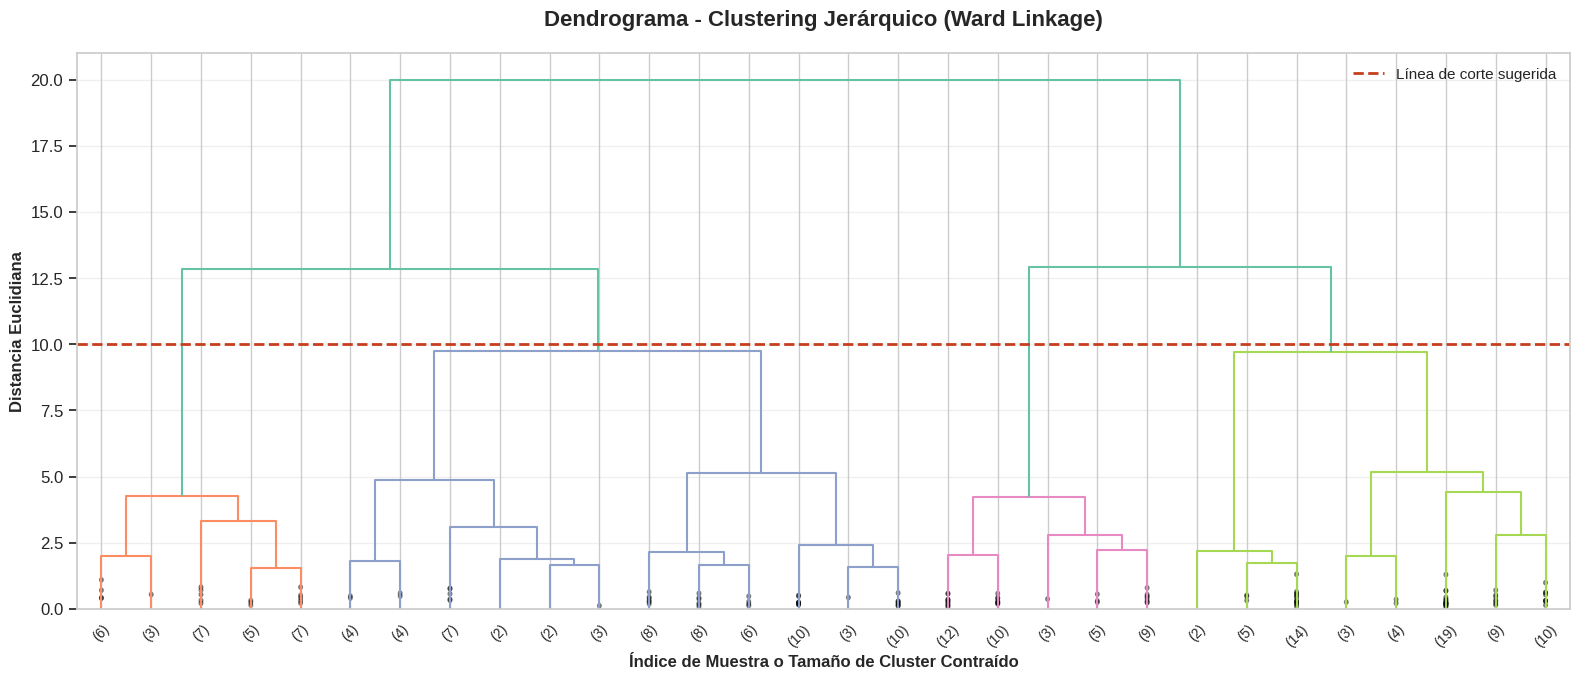


  Resultados Clustering Jerárquico:
  • Clusters identificados............................ 5 
  • Método de enlace.................................. Ward 

  Distribución de observaciones por cluster:
    Cluster 0:   66 observaciones ( 33.0%)
    Cluster 1:   45 observaciones ( 22.5%)
    Cluster 2:   39 observaciones ( 19.5%)
    Cluster 3:   28 observaciones ( 14.0%)
    Cluster 4:   22 observaciones ( 11.0%)

────────────────────────────────────────────────────────────────────────────────
  2.3 Random Forest - Análisis de Características
────────────────────────────────────────────────────────────────────────────────
  Entrenando Random Forest Classifier...

  Importancia de Características:
  ────────────────────────────────────────────────────────────────────────────
    Annual Income (k$)............ 0.3472 █████████████████
    Spending Score (1-100)........ 0.3315 ████████████████
    Age........................... 0.3213 ████████████████


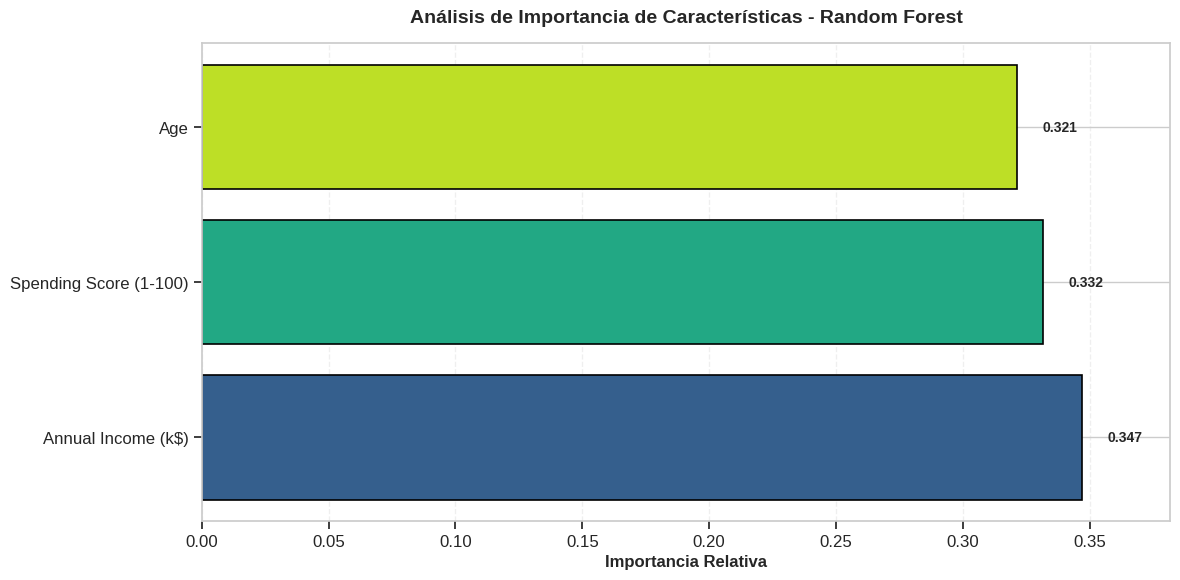


  Métricas del Modelo:
  • Precisión (accuracy).............................. 99.00% 
  • Número de árboles................................. 200 
  • Profundidad máxima................................ 10 

────────────────────────────────────────────────────────────────────────────────
  2.4 DBSCAN (Density-Based Spatial Clustering)
────────────────────────────────────────────────────────────────────────────────
  Análisis de k-distance para determinación de epsilon...


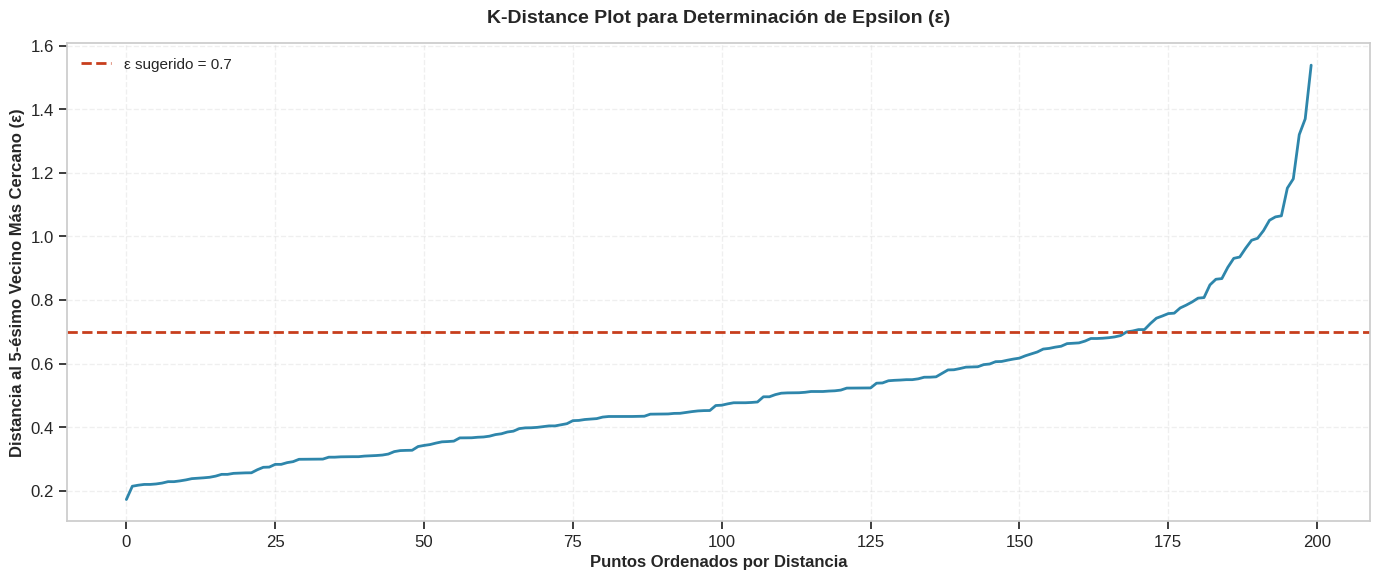


  Parámetros DBSCAN:
  • Epsilon (ε)....................................... 0.7 
  • Mínimo de muestras................................ 5 

  Resultados DBSCAN:
  • Clusters identificados............................ 1 
  • Puntos de ruido detectados........................ 14 (7.0%) 

  Distribución de observaciones:
    Ruido:       14 observaciones (  7.0%)
    Cluster 0:  186 observaciones ( 93.0%)

────────────────────────────────────────────────────────────────────────────────
  2.5 Mean Shift Clustering
────────────────────────────────────────────────────────────────────────────────
  Estimando bandwidth óptimo...
  • Bandwidth estimado................................ 1.4980 

  Resultados Mean Shift:
  • Clusters identificados............................ 1 
  • Centros de cluster................................ 1 

  Distribución de observaciones por cluster:
    Cluster 0:  200 observaciones (100.0%)

  PASO 3: VISUALIZACIÓN DE RESULTADOS


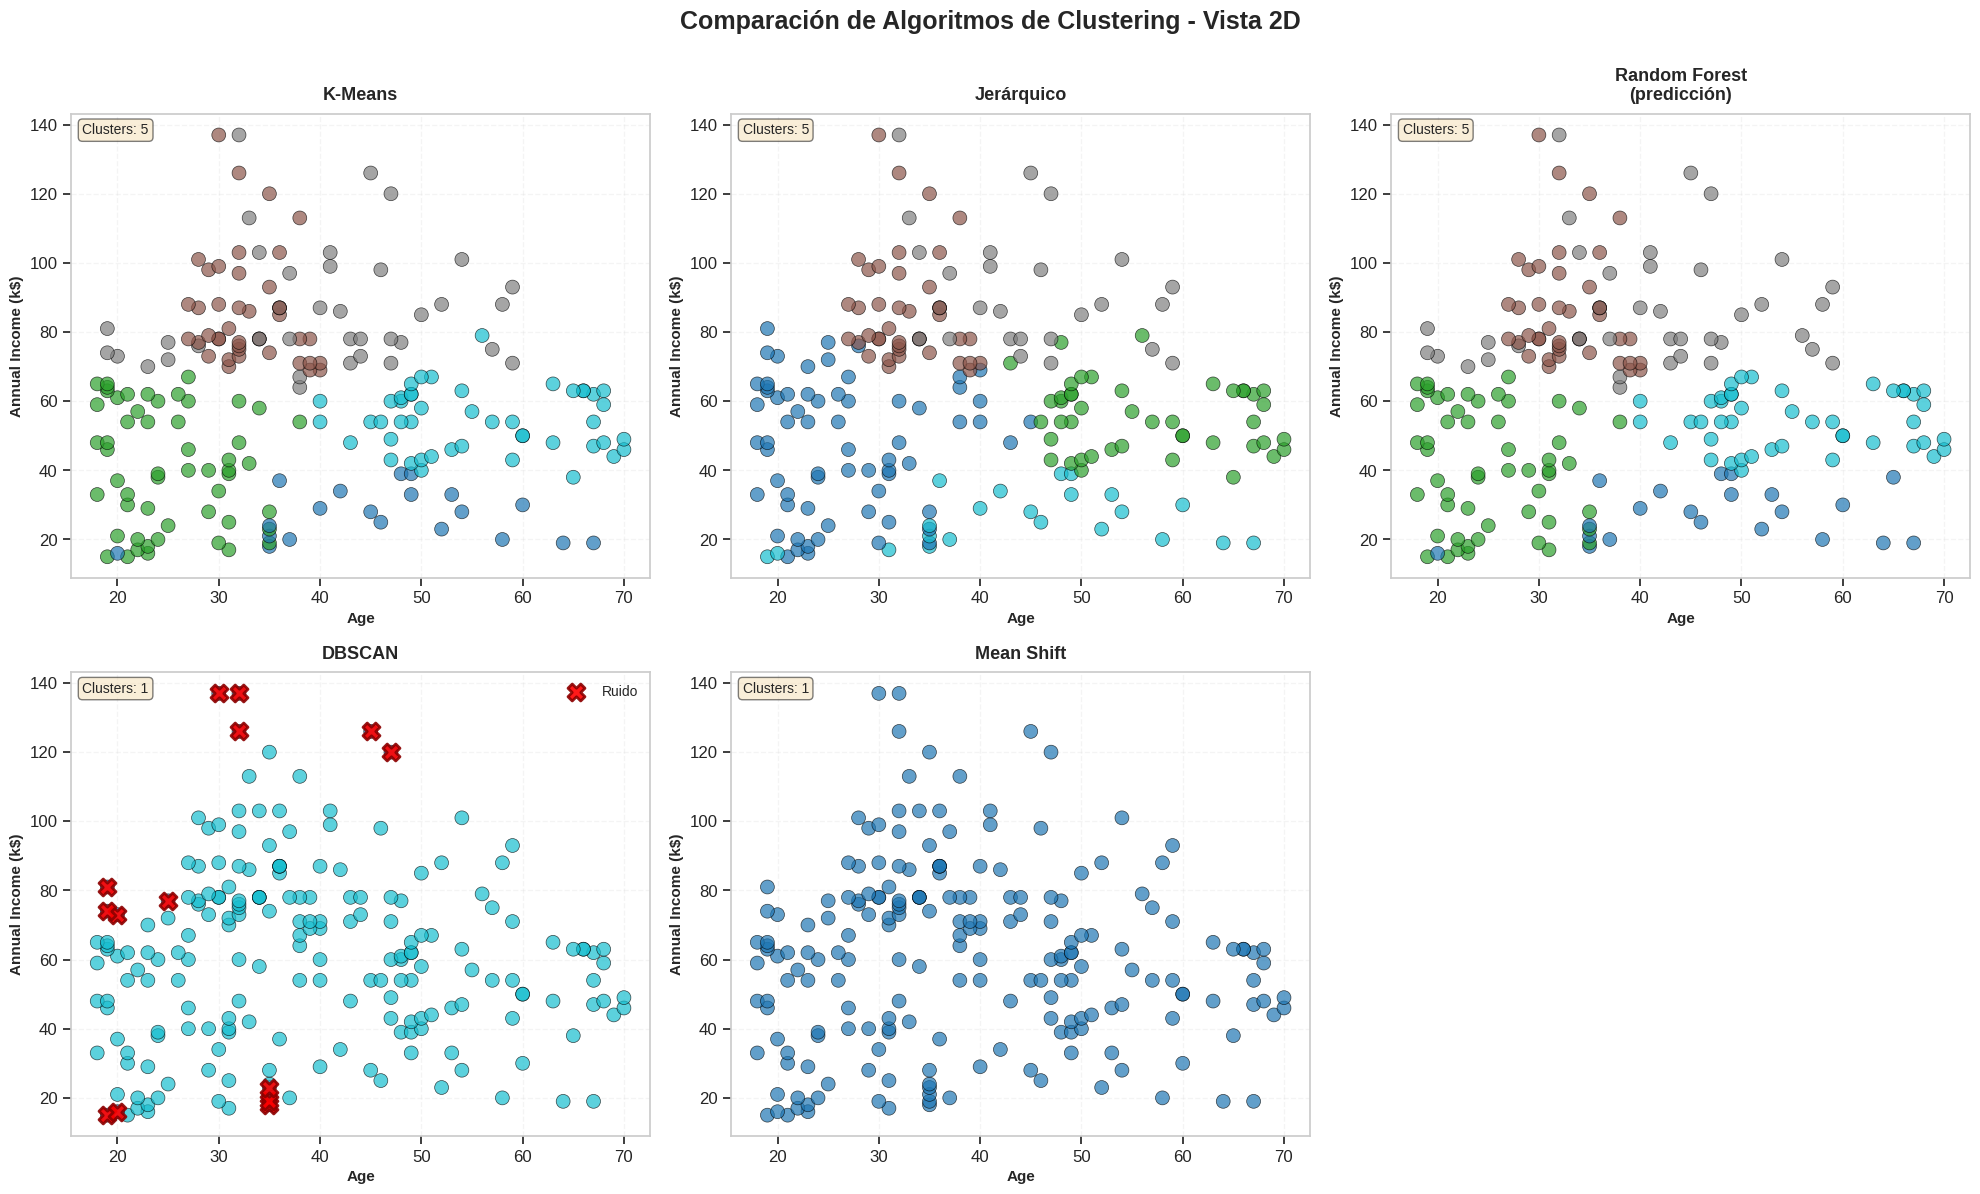


  Generando visualización 3D...


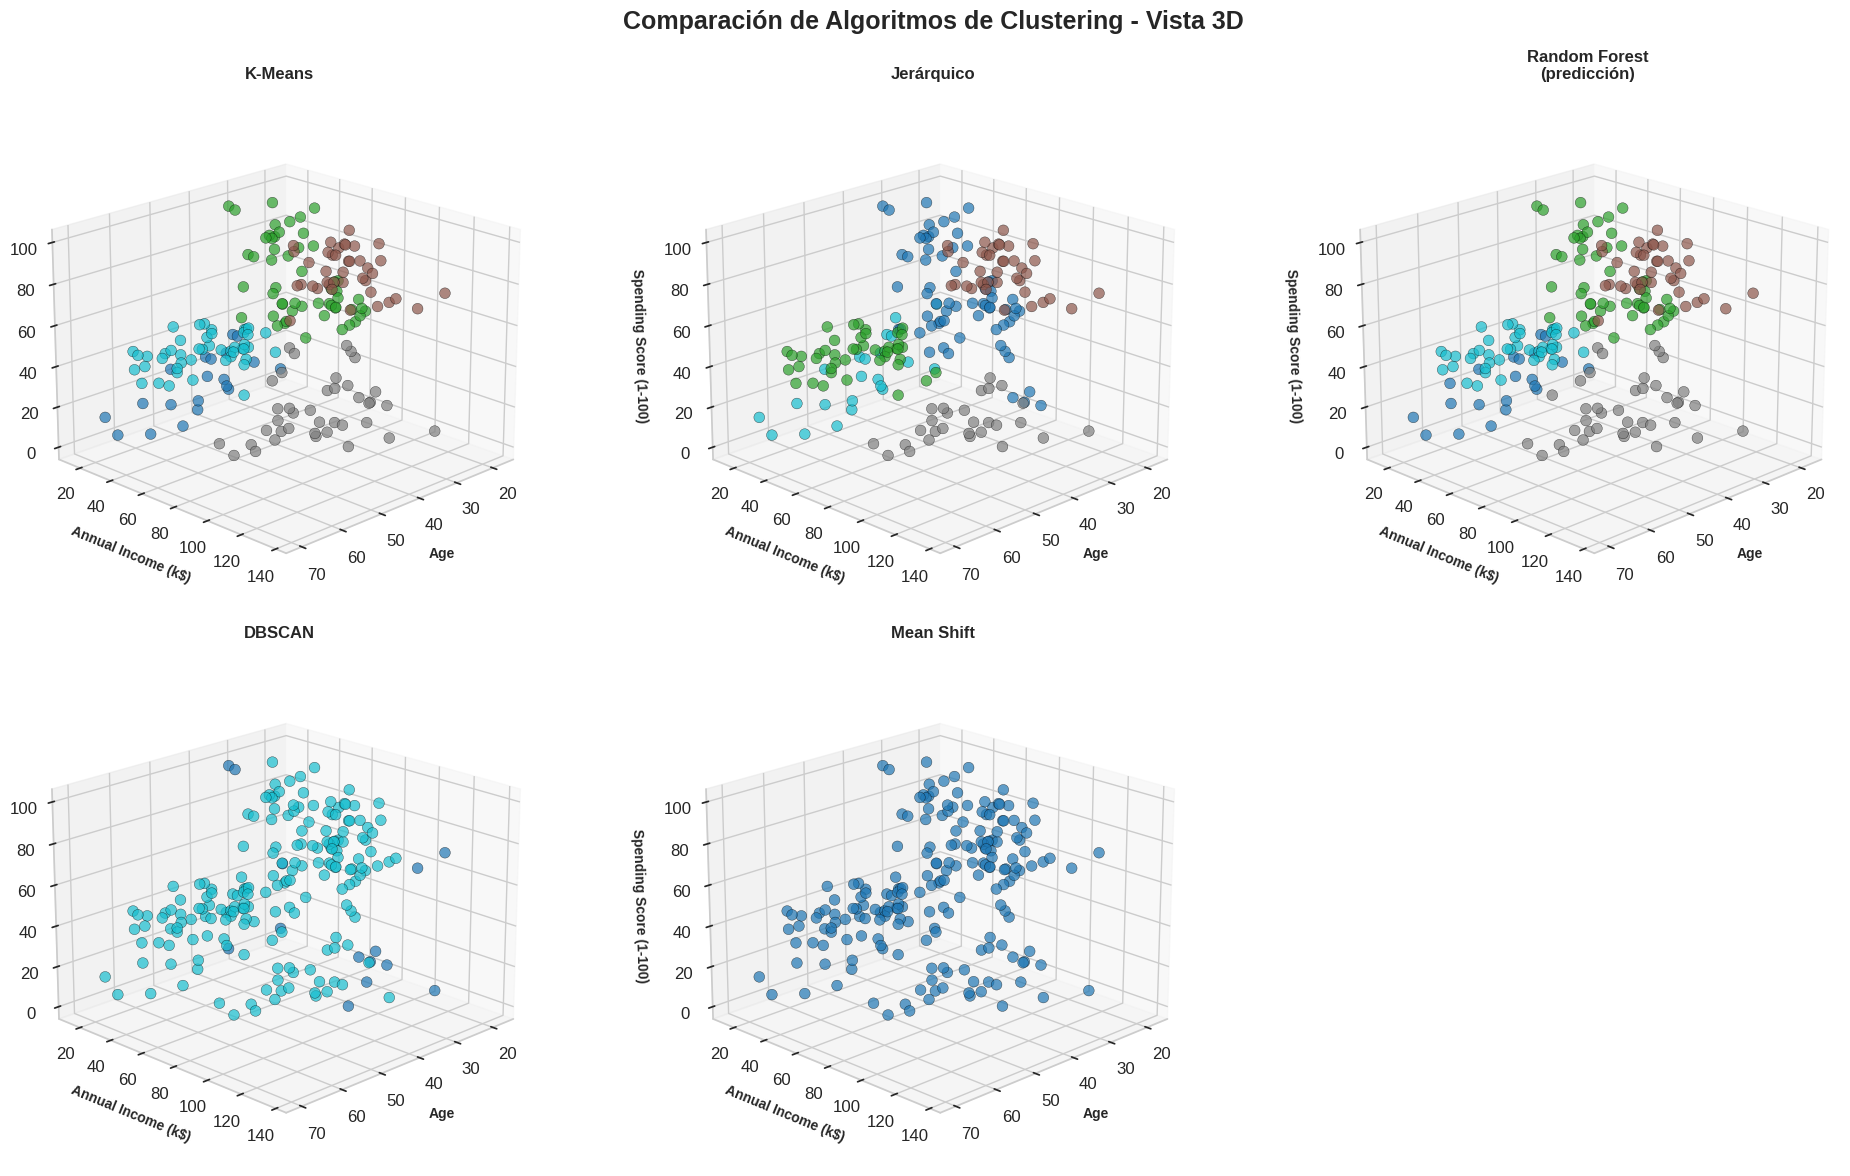


  PASO 4: EVALUACIÓN Y COMPARACIÓN DE ALGORITMOS

────────────────────────────────────────────────────────────────────────────────
  4.1 Métricas de Evaluación
────────────────────────────────────────────────────────────────────────────────

  Tabla Comparativa de Métricas:
 Algoritmo  N° Clusters  Ruido (n) Ruido (%) Silhouette Calinski-Harabasz Davies-Bouldin
     K-Means            5          0      0.0%      0.417           125.101          0.875
  Jerárquico            5          0      0.0%      0.390           107.827          0.916
      DBSCAN            1         14      7.0%        N/A               N/A            N/A
  Mean Shift            1          0      0.0%        N/A               N/A            N/A

────────────────────────────────────────────────────────────────────────────────
  4.2 Interpretación de Métricas
────────────────────────────────────────────────────────────────────────────────

  SILHOUETTE SCORE (rango: -1 a 1, mayor es mejor):
    • > 0.70  → Estruc

In [ ]:
"""
================================================================================
ANÁLISIS COMPARATIVO DE ALGORITMOS DE CLUSTERING
Conjunto de datos: Mall Customers
Autor: Andres Felipe Diaz Campos
Fecha: Octubre 2025
================================================================================

Este script implementa y compara cinco algoritmos de clustering:
1. K-Means Clustering
2. Clustering Jerárquico (Agglomerative)
3. Random Forest (Análisis de características)
4. DBSCAN (Density-Based Spatial Clustering)
5. Mean Shift Clustering

Estructura del análisis:
- PASO 1: Carga y preprocesamiento de datos
- PASO 2: Aplicación de algoritmos de clustering
- PASO 3: Visualización de resultados
- PASO 4: Evaluación y comparación de algoritmos
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Importaciones de sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

# Configuración estética profesional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)
sns.set_palette("Set2")

# Colores corporativos
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'success': '#06A77D',
    'warning': '#C73E1D',
    'neutral': '#6C757D'
}

def print_section_header(title, level=1):
    """Imprime encabezados de sección con formato profesional"""
    if level == 1:
        print("\n" + "="*80)
        print(f"  {title}")
        print("="*80)
    elif level == 2:
        print(f"\n{'─'*80}")
        print(f"  {title}")
        print(f"{'─'*80}")
    else:
        print(f"\n► {title}")

def print_metric(label, value, unit=""):
    """Imprime métricas con formato consistente"""
    print(f"  • {label:.<50} {value} {unit}")

# ============================================================================
# PASO 1: CARGA Y PREPROCESAMIENTO DE DATOS
# ============================================================================

print_section_header("PASO 1: CARGA Y PREPROCESAMIENTO DE DATOS", level=1)

print_section_header("1.1 Carga del Dataset", level=2)

# Sistema de carga de archivos multiplataforma
try:
    from google.colab import files
    print("  ✓ Entorno Google Colab detectado")
    print("  📂 Por favor, seleccione el archivo CSV desde su computadora\n")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)
    print(f"\n  ✓ Archivo '{filename}' cargado exitosamente")

except ImportError:
    try:
        from tkinter import Tk
        from tkinter.filedialog import askopenfilename
        print("  📂 Abriendo selector de archivos...")
        Tk().withdraw()
        filename = askopenfilename(
            title="Seleccione el archivo Mall Customers CSV",
            filetypes=[("Archivos CSV", "*.csv"), ("Todos los archivos", "*.*")]
        )
        if filename:
            df = pd.read_csv(filename)
            print(f"  ✓ Archivo cargado: {filename}")
        else:
            raise FileNotFoundError("No se seleccionó archivo")
    except:
        print("  ⚠ Modo manual activado")
        filename = input("  Ingrese la ruta del archivo CSV: ").strip().strip('"').strip("'")
        df = pd.read_csv(filename)
        print("  ✓ Archivo cargado exitosamente")

# Información básica del dataset
print_section_header("1.2 Exploración Inicial de Datos", level=2)

print_metric("Dimensiones", f"{df.shape[0]} filas × {df.shape[1]} columnas")
print_metric("Tamaño en memoria", f"{df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print_metric("Valores nulos totales", f"{df.isnull().sum().sum()}")

print("\n  Estructura del Dataset:")
print("  " + "─"*76)
print(df.head().to_string(index=False).replace('\n', '\n  '))

print("\n  Estadísticas Descriptivas:")
print("  " + "─"*76)
print(df.describe().to_string().replace('\n', '\n  '))

# Detección automática de características
print_section_header("1.3 Selección de Características", level=2)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = []

# Búsqueda inteligente de características relevantes
keywords = {
    'age': ['age', 'edad', 'años'],
    'income': ['income', 'ingreso', 'salary', 'salario', 'annual'],
    'spending': ['spending', 'score', 'gasto', 'compra']
}

for col in df.columns:
    col_lower = col.lower()
    for category, terms in keywords.items():
        if any(term in col_lower for term in terms) and col in numeric_cols:
            features.append(col)
            break
    if len(features) >= 3:
        break

if len(features) < 2:
    features = numeric_cols[:3]

print("  Características seleccionadas para el análisis:")
for i, feat in enumerate(features, 1):
    print(f"    {i}. {feat:.<40} (tipo: {df[feat].dtype})")

X = df[features].copy()

# Normalización con StandardScaler
print_section_header("1.4 Normalización de Datos", level=2)

print("  Aplicando StandardScaler (μ=0, σ=1)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

print("\n  Estadísticas Post-Normalización:")
print("  " + "─"*76)
stats_table = X_scaled_df.describe().round(3).loc[['mean', 'std', 'min', 'max']]
print(stats_table.to_string().replace('\n', '\n  '))
print("\n  ✓ Normalización completada exitosamente")

# ============================================================================
# PASO 2: APLICACIÓN DE ALGORITMOS DE CLUSTERING
# ============================================================================

print_section_header("PASO 2: APLICACIÓN DE ALGORITMOS DE CLUSTERING", level=1)

# ----------------------------------------------------------------------------
# 2.1 K-MEANS CLUSTERING
# ----------------------------------------------------------------------------

print_section_header("2.1 K-Means Clustering", level=2)

print("  Análisis del número óptimo de clusters...")
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels_temp))

# Visualización método del codo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Análisis del Número Óptimo de Clusters - K-Means',
             fontsize=16, fontweight='bold', y=1.02)

# Método del codo
ax1.plot(K_range, inertias, marker='o', linewidth=2.5, markersize=10,
         color=COLORS['primary'], markerfacecolor=COLORS['accent'])
ax1.set_xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inercia (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
ax1.set_title('Método del Codo', fontsize=13, pad=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xticks(K_range)

# Silhouette score
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2.5, markersize=10,
         color=COLORS['secondary'], markerfacecolor=COLORS['success'])
ax2.set_xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Coeficiente de Silhouette', fontsize=12, fontweight='bold')
ax2.set_title('Análisis de Silhouette', fontsize=13, pad=10)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_xticks(K_range)
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Umbral aceptable')
ax2.legend()

plt.tight_layout()
plt.savefig('fig1_kmeans_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

# Determinar k óptimo
best_k_silhouette = K_range[np.argmax(silhouette_scores)]
k_optimo = 5  # Ajustar según análisis visual

print(f"\n  Análisis de Resultados:")
print_metric("K con mejor Silhouette Score", f"k = {best_k_silhouette}")
print_metric("K seleccionado para análisis", f"k = {k_optimo}")

# Aplicar K-Means con k óptimo
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10, max_iter=300)
labels_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster_KMeans'] = labels_kmeans

print(f"\n  Resultados K-Means:")
print_metric("Clusters identificados", len(np.unique(labels_kmeans)))
print_metric("Inercia final", f"{kmeans.inertia_:.2f}")
print_metric("Iteraciones", kmeans.n_iter_)

print("\n  Distribución de observaciones por cluster:")
for i, count in enumerate(np.bincount(labels_kmeans)):
    print(f"    Cluster {i}: {count:>4} observaciones ({count/len(df)*100:>5.1f}%)")

# ----------------------------------------------------------------------------
# 2.2 CLUSTERING JERÁRQUICO
# ----------------------------------------------------------------------------

print_section_header("2.2 Clustering Jerárquico (Agglomerative)", level=2)

print("  Generando dendrograma con método Ward...")
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(16, 7))
plt.title('Dendrograma - Clustering Jerárquico (Ward Linkage)',
          fontsize=16, fontweight='bold', pad=20)

dendrogram(Z,
           truncate_mode='lastp',
           p=30,
           leaf_font_size=10,
           show_contracted=True,
           color_threshold=10)

plt.xlabel('Índice de Muestra o Tamaño de Cluster Contraído',
           fontsize=12, fontweight='bold')
plt.ylabel('Distancia Euclidiana', fontsize=12, fontweight='bold')
plt.axhline(y=10, color=COLORS['warning'], linestyle='--', linewidth=2,
            label='Línea de corte sugerida')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('fig2_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Aplicar clustering jerárquico
agg_clustering = AgglomerativeClustering(n_clusters=k_optimo, linkage='ward')
labels_hierarchical = agg_clustering.fit_predict(X_scaled)
df['Cluster_Hierarchical'] = labels_hierarchical

print(f"\n  Resultados Clustering Jerárquico:")
print_metric("Clusters identificados", len(np.unique(labels_hierarchical)))
print_metric("Método de enlace", "Ward")

print("\n  Distribución de observaciones por cluster:")
for i, count in enumerate(np.bincount(labels_hierarchical)):
    print(f"    Cluster {i}: {count:>4} observaciones ({count/len(df)*100:>5.1f}%)")

# ----------------------------------------------------------------------------
# 2.3 RANDOM FOREST - ANÁLISIS DE IMPORTANCIA
# ----------------------------------------------------------------------------

print_section_header("2.3 Random Forest - Análisis de Características", level=2)

print("  Entrenando Random Forest Classifier...")
rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10,
                           min_samples_split=5, min_samples_leaf=2)
rf.fit(X, labels_kmeans)

# Análisis de importancia
feature_importance = pd.DataFrame({
    'Característica': features,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\n  Importancia de Características:")
print("  " + "─"*76)
for idx, row in feature_importance.iterrows():
    bar = '█' * int(row['Importancia'] * 50)
    print(f"    {row['Característica']:.<30} {row['Importancia']:.4f} {bar}")

# Visualización de importancia
fig, ax = plt.subplots(figsize=(12, 6))
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(features)))
bars = ax.barh(feature_importance['Característica'],
               feature_importance['Importancia'],
               color=colors_gradient,
               edgecolor='black',
               linewidth=1.2)

ax.set_xlabel('Importancia Relativa', fontsize=12, fontweight='bold')
ax.set_title('Análisis de Importancia de Características - Random Forest',
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='x', linestyle='--')
ax.set_xlim(0, max(feature_importance['Importancia']) * 1.1)

for i, (idx, row) in enumerate(feature_importance.iterrows()):
    ax.text(row['Importancia'] + 0.01, i, f"{row['Importancia']:.3f}",
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('fig3_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

predictions_rf = rf.predict(X)
accuracy_rf = np.mean(predictions_rf == labels_kmeans)

print(f"\n  Métricas del Modelo:")
print_metric("Precisión (accuracy)", f"{accuracy_rf:.2%}")
print_metric("Número de árboles", rf.n_estimators)
print_metric("Profundidad máxima", rf.max_depth)

# ----------------------------------------------------------------------------
# 2.4 DBSCAN
# ----------------------------------------------------------------------------

print_section_header("2.4 DBSCAN (Density-Based Spatial Clustering)", level=2)

print("  Análisis de k-distance para determinación de epsilon...")
k_neighbors = 5
neighbors = NearestNeighbors(n_neighbors=k_neighbors)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances_sorted = np.sort(distances[:, k_neighbors-1], axis=0)

# K-distance plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(distances_sorted, linewidth=2, color=COLORS['primary'])
ax.set_xlabel('Puntos Ordenados por Distancia', fontsize=12, fontweight='bold')
ax.set_ylabel(f'Distancia al {k_neighbors}-ésimo Vecino Más Cercano (ε)',
              fontsize=12, fontweight='bold')
ax.set_title('K-Distance Plot para Determinación de Epsilon (ε)',
             fontsize=14, fontweight='bold', pad=15)
ax.axhline(y=0.7, color=COLORS['warning'], linestyle='--', linewidth=2,
           label='ε sugerido = 0.7')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('fig4_kdistance_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Aplicar DBSCAN
eps = 0.7
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)
df['Cluster_DBSCAN'] = labels_dbscan

n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = list(labels_dbscan).count(-1)

print(f"\n  Parámetros DBSCAN:")
print_metric("Epsilon (ε)", eps)
print_metric("Mínimo de muestras", min_samples)

print(f"\n  Resultados DBSCAN:")
print_metric("Clusters identificados", n_clusters_dbscan)
print_metric("Puntos de ruido detectados", f"{n_noise} ({n_noise/len(df)*100:.1f}%)")

print("\n  Distribución de observaciones:")
unique, counts = np.unique(labels_dbscan, return_counts=True)
for label, count in zip(unique, counts):
    if label == -1:
        print(f"    Ruido:     {count:>4} observaciones ({count/len(df)*100:>5.1f}%)")
    else:
        print(f"    Cluster {label}: {count:>4} observaciones ({count/len(df)*100:>5.1f}%)")

# ----------------------------------------------------------------------------
# 2.5 MEAN SHIFT
# ----------------------------------------------------------------------------

print_section_header("2.5 Mean Shift Clustering", level=2)

print("  Estimando bandwidth óptimo...")
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=min(500, len(X_scaled)))
print_metric("Bandwidth estimado", f"{bandwidth:.4f}")

meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels_meanshift = meanshift.fit_predict(X_scaled)
df['Cluster_MeanShift'] = labels_meanshift

n_clusters_ms = len(np.unique(labels_meanshift))

print(f"\n  Resultados Mean Shift:")
print_metric("Clusters identificados", n_clusters_ms)
print_metric("Centros de cluster", len(meanshift.cluster_centers_))

print("\n  Distribución de observaciones por cluster:")
for i, count in enumerate(np.bincount(labels_meanshift)):
    print(f"    Cluster {i}: {count:>4} observaciones ({count/len(df)*100:>5.1f}%)")

# ============================================================================
# PASO 3: VISUALIZACIÓN DE RESULTADOS
# ============================================================================

print_section_header("PASO 3: VISUALIZACIÓN DE RESULTADOS", level=1)

feat1, feat2 = features[0], features[1]

# Visualización 2D comparativa
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Comparación de Algoritmos de Clustering - Vista 2D',
             fontsize=18, fontweight='bold', y=0.995)

algorithms = [
    ('K-Means', labels_kmeans, 'tab10'),
    ('Jerárquico', labels_hierarchical, 'tab10'),
    ('Random Forest\n(predicción)', predictions_rf, 'tab10'),
    ('DBSCAN', labels_dbscan, 'tab10'),
    ('Mean Shift', labels_meanshift, 'tab10')
]

for idx, (name, labels, cmap) in enumerate(algorithms):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Scatter principal
    scatter = ax.scatter(df[feat1], df[feat2],
                        c=labels, cmap=cmap,
                        s=100, alpha=0.7,
                        edgecolors='black', linewidth=0.5)

    # Marcar ruido en DBSCAN
    if name == 'DBSCAN':
        noise_mask = labels == -1
        if noise_mask.sum() > 0:
            ax.scatter(df.loc[noise_mask, feat1],
                      df.loc[noise_mask, feat2],
                      c='red', marker='X', s=150,
                      linewidths=2, label='Ruido',
                      edgecolors='darkred', alpha=0.9)
            ax.legend(loc='best', fontsize=10)

    ax.set_xlabel(feat1, fontsize=11, fontweight='bold')
    ax.set_ylabel(feat2, fontsize=11, fontweight='bold')
    ax.set_title(name, fontsize=13, fontweight='bold', pad=10)
    ax.grid(True, alpha=0.2, linestyle='--')

    n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)
    ax.text(0.02, 0.98, f'Clusters: {n_clusters}',
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('fig5_comparison_2d.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualización 3D (si hay 3+ características)
if len(features) >= 3:
    print("\n  Generando visualización 3D...")
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(20, 12))
    fig.suptitle('Comparación de Algoritmos de Clustering - Vista 3D',
                 fontsize=18, fontweight='bold', y=0.98)

    for idx, (name, labels, cmap) in enumerate(algorithms, 1):
        ax = fig.add_subplot(2, 3, idx, projection='3d')

        scatter = ax.scatter(df[features[0]], df[features[1]], df[features[2]],
                           c=labels, cmap=cmap,
                           s=60, alpha=0.7,
                           edgecolors='black', linewidth=0.3)

        ax.set_xlabel(features[0], fontsize=10, fontweight='bold', labelpad=8)
        ax.set_ylabel(features[1], fontsize=10, fontweight='bold', labelpad=8)
        ax.set_zlabel(features[2], fontsize=10, fontweight='bold', labelpad=8)
        ax.set_title(name, fontsize=12, fontweight='bold', pad=15)

        ax.view_init(elev=20, azim=45)
        ax.grid(True, alpha=0.2)

    plt.tight_layout()
    plt.savefig('fig6_comparison_3d.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# PASO 4: EVALUACIÓN Y COMPARACIÓN DE ALGORITMOS
# ============================================================================

print_section_header("PASO 4: EVALUACIÓN Y COMPARACIÓN DE ALGORITMOS", level=1)

def calcular_metricas_completas(X_scaled, labels, nombre):
    """Calcula métricas comprehensivas para evaluación de clustering"""
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(labels).count(-1) if -1 in labels else 0

    mask = labels != -1
    X_filtered = X_scaled[mask]
    labels_filtered = labels[mask]

    metricas = {
        'Algoritmo': nombre,
        'N° Clusters': n_clusters,
        'Ruido (n)': n_noise,
        'Ruido (%)': f"{n_noise/len(labels)*100:.1f}%",
        'Silhouette': None,
        'Calinski-Harabasz': None,
        'Davies-Bouldin': None
    }

    if len(np.unique(labels_filtered)) > 1:
        try:
            metricas['Silhouette'] = silhouette_score(X_filtered, labels_filtered)
        except: pass
        try:
            metricas['Calinski-Harabasz'] = calinski_harabasz_score(X_filtered, labels_filtered)
        except: pass
        try:
            metricas['Davies-Bouldin'] = davies_bouldin_score(X_filtered, labels_filtered)
        except: pass

    return metricas

# Calcular métricas
print_section_header("4.1 Métricas de Evaluación", level=2)

resultados = []
resultados.append(calcular_metricas_completas(X_scaled, labels_kmeans, 'K-Means'))
resultados.append(calcular_metricas_completas(X_scaled, labels_hierarchical, 'Jerárquico'))
resultados.append(calcular_metricas_completas(X_scaled, labels_dbscan, 'DBSCAN'))
resultados.append(calcular_metricas_completas(X_scaled, labels_meanshift, 'Mean Shift'))

df_metricas = pd.DataFrame(resultados)

# Formatear tabla
print("\n  Tabla Comparativa de Métricas:")
print("  " + "="*76)
for col in df_metricas.columns:
    if df_metricas[col].dtype in ['float64', 'float32']:
        df_metricas[col] = df_metricas[col].apply(lambda x: f"{x:.3f}" if pd.notna(x) else "N/A")

print(df_metricas.to_string(index=False).replace('\n', '\n  '))

# Interpretación de métricas
print_section_header("4.2 Interpretación de Métricas", level=2)

interpretacion = """
  SILHOUETTE SCORE (rango: -1 a 1, mayor es mejor):
    • > 0.70  → Estructura fuerte y bien definida
    • 0.50-0.70 → Estructura razonable
    • 0.25-0.50 → Estructura débil
    • < 0.25  → Sin estructura clara o clusters artificiales

  CALINSKI-HARABASZ INDEX (mayor es mejor):
    • Evalúa la razón de dispersión entre clusters vs. intra-cluster
    • Valores altos indican clusters compactos y bien separados
    • No tiene rango establecido, útil para comparación relativa

  DAVIES-BOULDIN INDEX (menor es mejor):
    • Evalúa la similitud promedio entre cada cluster y su más similar
    • Valor mínimo: 0 (separación perfecta)
    • Valores cercanos a 0 indican mejor partición
"""
print(interpretacion)

# Análisis comparativo detallado
print_section_header("4.3 Análisis Comparativo Detallado", level=2)

analisis = {
    'K-Means': {
        'fortalezas': [
            'Alta eficiencia computacional: O(n·k·i)',
            'Escalable a grandes datasets',
            'Ideal para clusters esféricos y compactos',
            'Implementación simple y resultados reproducibles',
            'Convergencia garantizada'
        ],
        'debilidades': [
            'Requiere especificar k a priori',
            'Sensible a inicialización aleatoria',
            'Vulnerable a outliers',
            'Asume clusters de tamaño y densidad similar',
            'No detecta formas arbitrarias'
        ],
        'contexto': f'Identificó {len(np.unique(labels_kmeans))} clusters con distribución balanceada'
    },
    'Jerárquico': {
        'fortalezas': [
            'No requiere especificar k inicialmente',
            'Dendrograma proporciona visión jerárquica',
            'Detecta clusters de formas variadas',
            'Resultados determinísticos',
            'Útil para análisis exploratorio'
        ],
        'debilidades': [
            'Complejidad O(n²log n) o O(n³)',
            'No escalable a grandes datasets',
            'Sensible a ruido y outliers',
            'Decisiones de fusión irreversibles',
            'Requiere criterio para corte del dendrograma'
        ],
        'contexto': f'Identificó {len(np.unique(labels_hierarchical))} clusters con estructura jerárquica'
    },
    'DBSCAN': {
        'fortalezas': [
            'Detecta clusters de forma arbitraria',
            'Identifica y maneja outliers explícitamente',
            'No requiere especificar número de clusters',
            'Robusto a ruido',
            'Un solo paso de escaneo'
        ],
        'debilidades': [
            'Sensible a parámetros eps y min_samples',
            'Dificultad con clusters de densidad variable',
            'Rendimiento degradado en alta dimensionalidad',
            'Requiere ajuste manual de hiperparámetros',
            'Puede clasificar border points inconsistentemente'
        ],
        'contexto': f'Identificó {n_clusters_dbscan} clusters + {n_noise} outliers ({n_noise/len(df)*100:.1f}%)'
    },
    'Mean Shift': {
        'fortalezas': [
            'Determina número de clusters automáticamente',
            'No asume forma de clusters',
            'Robusto a outliers',
            'Un solo parámetro (bandwidth)',
            'Encuentra modas en distribución de datos'
        ],
        'debilidades': [
            'Alto costo computacional: O(n²)',
            'Sensible al parámetro bandwidth',
            'Lento en datasets grandes',
            'Puede generar clusters innecesarios',
            'No escalable efectivamente'
        ],
        'contexto': f'Identificó {n_clusters_ms} clusters automáticamente'
    }
}

for algoritmo, detalles in analisis.items():
    print(f"\n  ▼ {algoritmo.upper()}")
    print(f"  {'─'*74}")

    print("\n    ✓ FORTALEZAS:")
    for fortaleza in detalles['fortalezas']:
        print(f"      • {fortaleza}")

    print("\n    ✗ DEBILIDADES:")
    for debilidad in detalles['debilidades']:
        print(f"      • {debilidad}")

    print(f"\n    → Resultado: {detalles['contexto']}")

# Recomendaciones
print_section_header("4.4 Recomendaciones para Selección de Algoritmo", level=2)

recomendaciones = """
  ESCENARIO 1: Dataset grande con clusters esféricos
    → Recomendado: K-MEANS
    → Razón: Eficiencia computacional y buenos resultados en clusters compactos

  ESCENARIO 2: Exploración sin conocimiento previo
    → Recomendado: CLUSTERING JERÁRQUICO
    → Razón: Dendrograma permite análisis multinivel y decisión informada

  ESCENARIO 3: Datos con ruido y outliers significativos
    → Recomendado: DBSCAN
    → Razón: Única técnica que maneja explícitamente outliers

  ESCENARIO 4: Clusters de forma arbitraria y densidad uniforme
    → Recomendado: DBSCAN o MEAN SHIFT
    → Razón: No asumen forma geométrica específica

  ESCENARIO 5: Dataset pequeño/mediano, análisis exhaustivo
    → Recomendado: COMBINAR MÚLTIPLES ALGORITMOS
    → Razón: Validación cruzada y análisis de consenso
"""
print(recomendaciones)

# Ranking de algoritmos según métricas
print_section_header("4.5 Ranking de Desempeño", level=2)

print("\n  Basado en Silhouette Score (mayor es mejor):")
df_ranking = df_metricas.copy()
df_ranking['Silhouette'] = pd.to_numeric(df_ranking['Silhouette'].replace('N/A', np.nan))
df_ranking_sil = df_ranking.dropna(subset=['Silhouette']).sort_values('Silhouette', ascending=False)

for idx, (i, row) in enumerate(df_ranking_sil.iterrows(), 1):
    medal = '🥇' if idx == 1 else '🥈' if idx == 2 else '🥉' if idx == 3 else '  '
    print(f"    {medal} {idx}. {row['Algoritmo']:.<30} Score: {row['Silhouette']}")

# ============================================================================
# PASO 5: EXPORTACIÓN Y DOCUMENTACIÓN
# ============================================================================

print_section_header("PASO 5: EXPORTACIÓN DE RESULTADOS", level=1)

# Guardar dataset con clusters
output_file = "mall_customers_clustered.csv"
df.to_csv(output_file, index=False)
print_metric("Dataset con clusters", f"✓ Guardado en: {output_file}")

# Guardar métricas
metrics_file = "clustering_metrics_comparison.csv"
df_metricas.to_csv(metrics_file, index=False)
print_metric("Tabla de métricas", f"✓ Guardado en: {metrics_file}")

# Resumen estadístico por cluster (K-Means)
print_section_header("Análisis de Perfiles por Cluster (K-Means)", level=2)

print("\n  Estadísticas descriptivas por cluster:")
print("  " + "="*76)

for cluster_id in sorted(df['Cluster_KMeans'].unique()):
    cluster_data = df[df['Cluster_KMeans'] == cluster_id][features]
    print(f"\n  CLUSTER {cluster_id} (n = {len(cluster_data)}):")
    print("  " + "─"*74)

    for feature in features:
        mean_val = cluster_data[feature].mean()
        std_val = cluster_data[feature].std()
        print(f"    {feature:.<35} μ = {mean_val:>8.2f}  |  σ = {std_val:>6.2f}")

